In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
Data1 = pd.DataFrame([[0,75,99,9,35,63,8],[51,0,86,46,88,29,20],[100,5,0,16,28,35,28],
                      [20,45,11,0,59,53,49],[86,63,33,65,0,76,72],[36,53,89,31,21,0,52],
                      [58,31,43,67,52,60,0]], columns=["A","B","C","D","E","F","G"],
                     index=["A","B","C","D","E","F","G"]) # Dataframe for 7-cities

In [9]:
X0 = ["A","C","G","D","E","B","F"] # Initial solution

Distances = [] # The OF of the initial solution
t = 0
for i in range(len(X0)-1):
    X1 = Data1.loc[X0[t],X0[t+1]] # Each city and the city after it
    X11 = Data1.loc[X0[-1],X0[0]] # The last city to the first city
    Distances.append(X1) # Append the distances
    t = t+1

Distances.append(X11) # Append the distance of the last city with the first one
Length_of_Travel = sum(Distances) # Add up the distances
print(X0)
print(Distances)
print("Length_of_Travel:",Length_of_Travel)

['A', 'C', 'G', 'D', 'E', 'B', 'F']
[99, 28, 67, 59, 63, 29, 36]
Length_of_Travel: 381


In [15]:
### PARAMETERS ###

T0 = 3000 # initial tempereture
M = 1000 # how many times the temp will decrease
N = 50 # nb of neigbours at each T
Alpha = 0.75 # cooling rate

# For visualization
Temp = []
Min_Distance = []
for i in range(M): # for every decrease 
    for j in range(N): # take N neighbours (here 50)
        # we have to swap cities
        # To generate random integers in order to swap cities
        Ran1 = np.random.randint(0,len(X0)) # will randomly pick a city
        Ran2 = np.random.randint(0,len(X0)) # will randomly pick another city
        while Ran1 == Ran2:
            Ran2 = np.random.randint(0,len(X0))
        
        Xtemp = [] # empty list for new temporary solution
        A1 = X0[Ran1] # Select the city to swap
        A2 = X0[Ran2] # Select the city to swap with
        
        # ["A","C","G","D","E","B","F"]     
         # Making a new list of the new set of cities
        w = 0
        for i in X0: # for every city in initial solution
            if X0[w]==A1: # if 1st city = randomly selected city A1
                Xtemp=np.append(Xtemp,A2) # append to temp. sol. A2 (2nd random city)
            elif X0[w]==A2: # if 1st city=randomly selected city A2
                Xtemp=np.append(Xtemp,A1) # append to temp. sol. A1 (2nd random city)
            else:
                Xtemp=np.append(Xtemp,X0[w])
            w = w+1
        
        Xtemp = list(Xtemp)
        
        
        
        Distances_X0 = [] # The OF of the solution in hand
        t = 0
        for i in range(len(X0)-1):
            X1_1 = Data1.loc[X0[t],X0[t+1]] # Each city and the city after it
            X11 = Data1.loc[X0[-1],X0[0]] # The last city to the first city
            Distances_X0.append(X1_1) # Append the distances
            t = t+1
        
        Distances_X0.append(X11) # Append the distance of the last city with the first one
        Len_X0 = sum(Distances_X0) # Add up the distances
        
        
        Distances_Xtemp = [] # The OF of the potential solution (n+1)
        t = 0
        for i in range(len(Xtemp)-1):
            X1_2 = Data1.loc[Xtemp[t],Xtemp[t+1]] # Each city and the city after it
            X11 = Data1.loc[Xtemp[-1],Xtemp[0]] # The last city to the first city
            Distances_Xtemp.append(X1_2) # Append the distances
            t = t+1
        
        Distances_Xtemp.append(X11) # Append the distance of the last city with the first one
        Len_Xtemp = sum(Distances_Xtemp) # Add up the distances
        
        
        rand_num = np.random.rand() # RN for the formula below
        form_1 = 1/(np.exp((Len_Xtemp-Len_X0)/T0)) # The formula to accept moves
        
        if Len_Xtemp <= Len_X0: # If the OF of the potential solution was better (less)
            X0 = Xtemp
        
        elif rand_num <= form_1: # If the RN was less than the formula
            X0 = Xtemp
        
        else: # Don't accept the potential solution and stay where you are
            X0 = X0
            
    Temp = np.append(Temp, T0) # Append temps. for visualization
    Min_Distance = np.append(Min_Distance,Len_Xtemp) # Append costs for visualization
    
    T0 = Alpha*T0 # Decrease the temp.

C:\Users\Cristina\anaconda3\lib\site-packages\ipykernel_launcher.py:65: RuntimeWarning: overflow encountered in exp


In [16]:
print
print
print("Final Solution is: ", X0)
print("Minimized Distance at Final Solution is: ", Len_X0)

Final Solution is:  ['E', 'C', 'D', 'A', 'G', 'B', 'F']
Minimized Distance at Final Solution is:  158


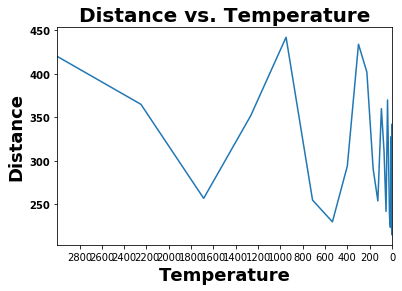

In [17]:
plt.plot(Temp,Min_Distance)
plt.title("Distance vs. Temperature",fontsize=20,fontweight='bold')
plt.xlabel("Temperature",fontsize=18,fontweight='bold')
plt.ylabel("Distance",fontsize=18,fontweight='bold')
plt.xlim(3000, 0)
plt.xticks(np.arange(min(Temp), max(Temp), 200),fontsize=10)
plt.yticks(fontweight='bold')
plt.show()